# Programme for Data Analysis: Simulating a Real World Phenomenon

## Exploring the impact of Third Level Education on Employment Attainment
### GMIT Higher Diploma 
### Programming for Data Analytics
#### Author: Martina O'Brien
#### Submissiom date: 13 December 2019<br>
Submitted as part of the requirements for the GMIT Higher Diploma in Data Analysis as part of the module Programme for Data Analysis 2019

### **Table of Contents:**<br>
**Section 1: Introduction**:<br>
1.1:Introduction and Background<br>
1.2:Motivation<br>

**Section 2:Modeling and Sythesising the Data:**<br>
2.1: Setting up the dataframe<br>
2.2: Creating Dataframe<br>
2.3: Sythesising the Data<br>
2.4: Weighting of Variables<br>
2.5: Distributions in the Dataframe<br>
2.6: Relationships between the variables<br>

**Section 3: Conclusion:**<br>
3.1: Potential areas of future explorations<br>

**Section 4: References:**<br>
4.1: References<br>
4.2: Useful Links<br>

##### Importing Libraries for use in the Notebook

In [2]:
#Importing Libraries needed for notebook
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline #calling the magic command to display plots

UsageError: unrecognized arguments: #calling the magic command to display plots


### **Section 1: Introduction**

#### Introduction and Background to the Real-World Phenomenon: Educational Attainment and Employment
 
Educational attainment is well known to be a factor influencing the employment predictability of an individual https://www.oecd-ilibrary.org/docserver/eag_highlights-2012-11-en.pdf?expires=1575233714&id=id&accname=guest&checksum=6E048A8FBA5F60213205266CDAA4CE07 http://www.welfare.ie/en/Pages/Chapter-3_-Risk-and-Protection-for-Children.aspx. In Ireland, it is compulsory to attend full time education from the ages of 6  - 16 years or until the finish of 3 years of second level education or the completion of the Junior Cycle curriculum under the Education Act 2000 https://www.citizensinformation.ie/en/education/the_irish_education_system/overview_of_the_irish_education_system.html <br>

While Ireland is currently reaching full employment, with only 4.8% unemployment existing.  https://www.cso.ie/en/statistics/labourmarket/monthlyunemployment/ , equal to that of in 2007 before the economic recession, http://www.welfare.ie/en/Pages/Chapter-3_-Risk-and-Protection-for-Children.aspx., unemployment and its link to educational attainment still needs to be explored. There are still considerable disparities with 12.3%  of young people currently unemployed https://tradingeconomics.com/ireland/youth-unemployment-rate. Early school leavers are particularly vulnerable to labour market isolation. http://publicpolicy.ie/papers/education-and-employment-a-review-of-educational-attainment-and-labour-market-outcomes/ <br>

##### About this dataset:  <br>
In November, 2019, the most recent Educational Attainment Thematic Report 2019 was released by the Central Statistics Office, detailing the key findings in the relationship between educational attainment and employment https://pdf.cso.ie/www/pdf/20191121085016_Educational_Attainment_Thematic_Report_2019_full.pdf. This notebook will explore the relationship between educational attainment and employment in Ireland today.

The dataset will contain 200 data points over 4 variable: gender, age, educational attainment and employment.

| Variable  | Type | Description |
| --- | --- | --- |
| Gender | Categorical | Sex - Male/Female |
| Age | Numerical | Value between 25 and 65|
| Educational Attainment | Categorical | Highest level of education obtained|
|Employment | Categorical | Employment status - Yes/No|

Age	Numerical	Value between 25  and 65 
Educational Attainment	Categorical	Based on the highest level of education obtained at time of data being collected: 
Employment	Categorical	Employment status of data point

A dataset will be modelled on the findings of the above report insofar as possible and randomly synthesised for the purpose of this report. The weighted variables and methodology will be outlined in the next section. 


#### Motivation for this project: 
As a youth work professional in the area of youth entrepreneurship, identifying barriers for accessing education is a key aspect of the role. This project will enable me to gain some further insight into the current picture of unemployment in Ireland and the socio economic factors that may be associated with that.   

### Section 2: Modelling and Synthesising the Data

#### 2.1: Creating a dataframe: <br>

In this section, a dataframe will be created using the numpy.random function. The data will be replicable where applicable. Firstly, the data for the variables will be created. This data is based on CSO variance on each of the four variables. <br>

**Age** <br>

Firstly, the age variable is generated. It is done by using the np.random.seed function to ensure that the data generated is the same each time the notebook is ran. Next, random ages are generated between 25 - 64 years at 200 data points. This will represent that ages withing the data set. The ages are rounded up or down to give a whole integer. Finally, the data frame is created to be used further on in the dataset.

In [12]:
np.random.seed(1500) #Using the seed function to ensure the output in the same every time the notebook is run
#https://www.sharpsightlabs.com/blog/numpy-random-seed/
age =np.random.randint(25,65,200) # randomly generate numbers between 25 and 64 with 200 datapoint
# https://www.geeksforgeeks.org/random-sampling-in-numpy-randint-function/
age = age.round(0) # Round the integers
#https://stackoverflow.com/questions/46994426/how-to-round-numpy-array
age_df = pd.DataFrame(age, columns=['Age'])#Creating a dataframe with a column heading 'Age'
age_df.head()# Displaying the head of the dataframe

,Age
0,44
1,36
2,26
3,27
4,40


To further explore the dataset generated, the describe function is called. 

In [13]:
age_df.describe()

,Age
count,200.000000
mean,43.150000
std,11.781832
min,25.000000
25%,33.750000
50%,42.000000
75%,52.000000
max,64.000000


The mean of the dataframe is 43.15 years and the mode is 42 indicating that the data in the table are slightly skewed to the left. The below distribution visualises the spread. #https://cnx.org/contents/bE-w34Vi@9/Descriptive-Statistics-Skewness-and-the-Mean-Median-and-Mode

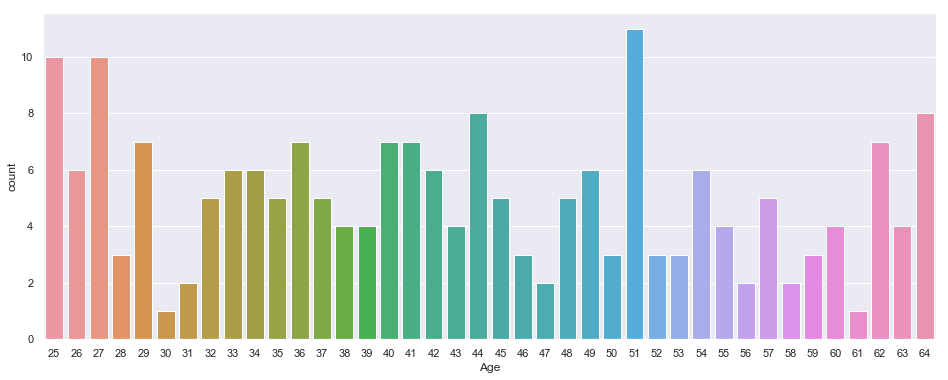

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot('Age', data= age_df)

C:\Users\Owner1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


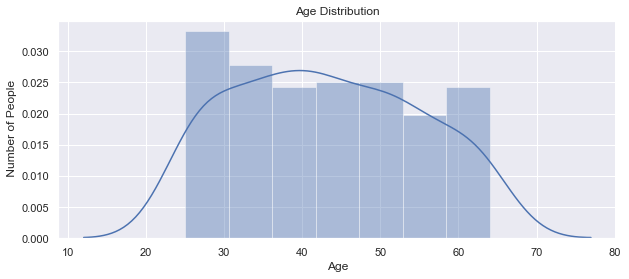

In [15]:
#https://pythonbasics.org/seaborn-distplot/
sns.set(rc={"figure.figsize": (10, 4)})
ax = sns.distplot(age_df)
plt.title("Age Distribution") # Title for the graph
plt.xlabel("Age") # X-Axis labelling
plt.ylabel(" Number of People") # Y-Axis labelling
plt.show()

#### Education Attainment  <br>

The Education Attainment variable is categorical with 5 values: Primary Level, Lower Secondary Level, Upper Secondary Level, Post Level Certificate and Third Level. Using the Thematic Report from November 2019 referenced in this sections introduction, weighting will be added in to ensure the data is simulating a real life phenomenon.

In [16]:
#References for values contained in the dataset
level = ['Primary Level', 'Lower Secondary', 'Higher Secondary', 'Post Leaving Certificate', 'Third Level']
#Based on statistics, a probability for each string is created.
# Probability is as follows: Primary Level is the lowest, Lower Secondary is .11 and so on
prob = [0.05, 0.11, 0.22, 0.15, 0.47]
education_level = np.random.choice(level, 200, p=prob) #random choice is used to generate the dataframe

# Creates a dataframe
education_level_df = pd.DataFrame(education_level, columns=['Education Level'])

#showing the first 5 references
education_level_df.head()

,Education Level
0,Third Level
1,Higher Secondary
2,Third Level
3,Lower Secondary
4,Third Level


In [17]:
education_level_df.describe()

,Education Level
count,200
unique,5
top,Third Level
freq,94


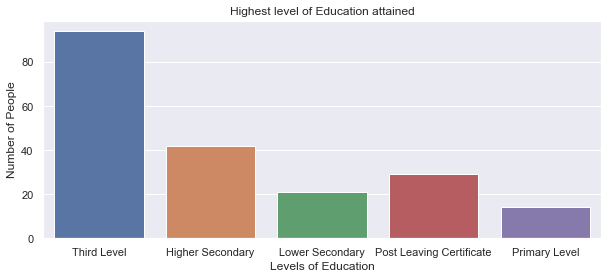

In [18]:
sns.set(rc={"figure.figsize": (10, 4)})
ax = sns.countplot(x ='Education Level', data = education_level_df)
plt.title("Highest level of Education attained") # Title for the graph
plt.xlabel("Levels of Education") # X-Axis labelling
plt.ylabel("Number of People") # Y-Axis labelling
plt.show()

In [19]:
gender = ['male','female']
sex = np.random.choice(gender, 200)
gender_df = pd.DataFrame(sex, columns=['Gender'])
gender_df.head()

,Gender
0,male
1,male
2,female
3,male
4,female


,Age,Education Level,Gender
0,44,Third Level,male
1,36,Higher Secondary,male
2,26,Third Level,female
3,27,Lower Secondary,male
4,40,Third Level,female
5,44,Third Level,male
6,41,Higher Secondary,male
7,49,Third Level,female
8,42,Lower Secondary,female
9,32,Third Level,male
